In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN,Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [79]:
dataset=pd.read_csv('/content/drive/MyDrive/nifty.csv')

In [80]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600
1,2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600
2,2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000
3,2022-06-03,16761.650391,16793.849609,16567.900391,16584.300781,16584.300781,245500
4,2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600
...,...,...,...,...,...,...,...
244,2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900
245,2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700
246,2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300
247,2023-05-30,18606.650391,18662.449219,18575.500000,18633.849609,18633.849609,234400


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [82]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [83]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600
1,2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600
2,2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000
3,2022-06-03,16761.650391,16793.849609,16567.900391,16584.300781,16584.300781,245500
4,2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600
...,...,...,...,...,...,...,...
244,2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900
245,2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700
246,2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300
247,2023-05-30,18606.650391,18662.449219,18575.500000,18633.849609,18633.849609,234400


In [84]:
dataset['Open']=dataset['Open'].astype('int32')
dataset['Close']=dataset['Close'].astype('int32')
dataset['High']=dataset['High'].astype('int32')
dataset['Low']=dataset['Low'].astype('int32')
dataset['Adj Close']=dataset['Adj Close'].astype('int32')

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       249 non-null    int32         
 2   High       249 non-null    int32         
 3   Low        249 non-null    int32         
 4   Close      249 non-null    int32         
 5   Adj Close  249 non-null    int32         
 6   Volume     249 non-null    int64         
dtypes: datetime64[ns](1), int32(5), int64(1)
memory usage: 8.9 KB


In [86]:
lab=LabelEncoder()
mms=MinMaxScaler()

In [87]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-31,16578,16690,16521,16584,16584,651600
1,2022-06-01,16594,16649,16438,16522,16522,249600
2,2022-06-02,16481,16646,16443,16628,16628,236000
3,2022-06-03,16761,16793,16567,16584,16584,245500
4,2022-06-06,16530,16610,16444,16569,16569,233600
...,...,...,...,...,...,...,...
244,2023-05-25,18268,18338,18202,18321,18321,235900
245,2023-05-26,18368,18508,18333,18499,18499,198700
246,2023-05-29,18619,18641,18581,18598,18598,265300
247,2023-05-30,18606,18662,18575,18633,18633,234400


In [88]:
num_cols=dataset.select_dtypes(include=np.number).columns

In [89]:
date_cols=dataset.select_dtypes(include='datetime64[ns]').columns

In [90]:
num_cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [91]:
date_cols

Index(['Date'], dtype='object')

In [92]:
for cols in date_cols:
  dataset[cols]=lab.fit_transform(dataset[cols])

In [93]:
for col in num_cols:
  dataset[col]=mms.fit_transform(dataset[[col]])

In [94]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0.362879,0.373181,0.372184,0.366866,0.366866,1.000000
1,1,0.367324,0.361484,0.349096,0.349247,0.349247,0.383057
2,2,0.335927,0.360628,0.350487,0.379369,0.379369,0.362185
3,3,0.413726,0.402568,0.384979,0.366866,0.366866,0.376765
4,4,0.349542,0.350357,0.350765,0.362603,0.362603,0.358502
...,...,...,...,...,...,...,...
244,244,0.832453,0.843367,0.839777,0.860472,0.860472,0.362032
245,245,0.860239,0.891869,0.876217,0.911054,0.911054,0.304942
246,246,0.929981,0.929815,0.945202,0.939187,0.939187,0.407152
247,247,0.926368,0.935806,0.943533,0.949133,0.949133,0.359730


In [95]:
x=dataset.drop('Adj Close',axis=1)
y=dataset['Adj Close']

In [96]:
x.shape,y.shape

((249, 6), (249,))

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [99]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((199, 6), (50, 6), (199,), (50,))

In [100]:
x_train=x_train.values
x_test=x_test.values

In [101]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [102]:
input_shape=(x_train.shape[1],1)

In [103]:
#let's create a time series forecasting model in keras.
model=Sequential()

In [104]:
model.add(LSTM(units=128,activation='relu',input_shape=input_shape,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 6, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 6, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [107]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [108]:
training=model.fit(x_train,y_train,epochs=1000,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 1.9028 - mae: 1.1062 - val_loss: 0.2089 - val_mae: 0.3903
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2203 - mae: 0.4171 - val_loss: 0.0856 - val_mae: 0.2435
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1292 - mae: 0.3018 - val_loss: 0.0297 - val_mae: 0.1436
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0821 - mae: 0.2263 - val_loss: 0.0171 - val_mae: 0.1042
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0611 - mae: 0.1986 - val_loss: 0.0196 - val_mae: 0.1172
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0514 - mae: 0.1783 - val_loss: 0.0159 - val_mae: 0.1020
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0477 - mae: 0.1674 - val_loss: 0.0304 - val_mae: 0.1536
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0468 - mae: 0.1749 - val_loss: 0.0178 - val_mae: 0.1116
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.03

In [109]:
# Get the training loss and accuracy from the history object
train_loss_ann = training.history['loss'][-1]  # Last epoch's training loss
train_accuracy_ann = training.history['mae'][-1]  # Last epoch's training accuracy
print('Loss value in the training phase during ANN is',train_loss_ann)
print('Accuacy value during the training phase during ANN is',train_accuracy_ann)
# Get the validation loss and accuracy from the history object
val_loss_ann = training.history['val_loss'][-1]  # Last epoch's validation loss
val_accuracy_ann = training.history['val_mae'][-1]  # Last epoch's validation accuracy
print('Val_loss in the training phase during ANN is',val_loss_ann)
print('Val_acc value during the training phase during ANN is',val_accuracy_ann)

Loss value in the training phase during ANN is 0.03399744629859924
Accuacy value during the training phase during ANN is 0.14640484750270844
Val_loss in the training phase during ANN is 0.02581988275051117
Val_acc value during the training phase during ANN is 0.14062923192977905


In [110]:
test_loss_ann, test_accuracy_ann=model.evaluate(x_test,y_test,batch_size=55)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0215 - mae: 0.1180


In [111]:
print("Test Loss in ANN:",test_loss_ann)
print("Test Accuracy in ANN:",test_accuracy_ann)

Test Loss in ANN: 0.021479688584804535
Test Accuracy in ANN: 0.11801985651254654


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step


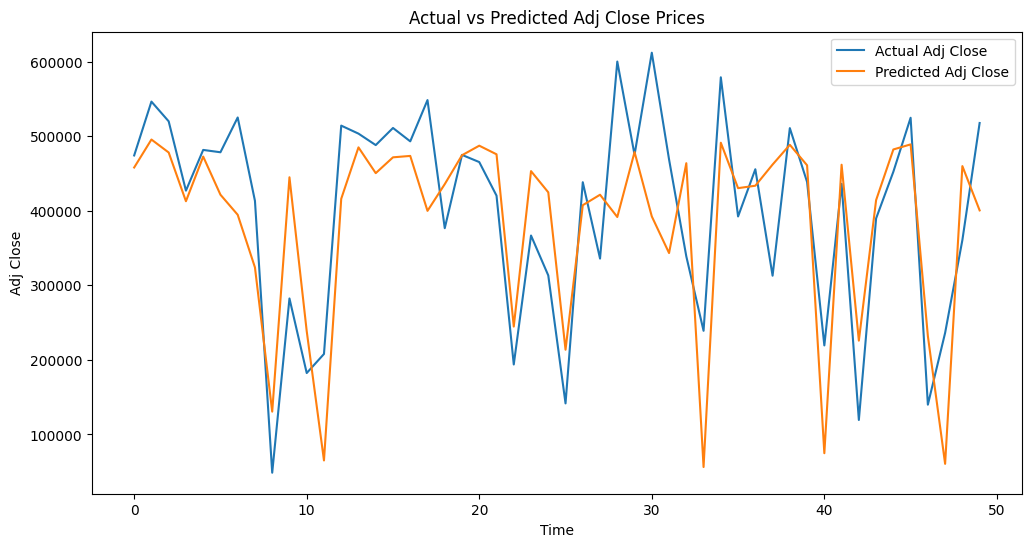

In [112]:
# Predict on the test data
y_pred = model.predict(x_test)

# Inverse transform the scaled data to get the actual values
y_test_original = mms.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = mms.inverse_transform(y_pred)

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Adj Close')
plt.plot(y_pred_original, label='Predicted Adj Close')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Adj Close Prices')
plt.legend()
plt.show()